In [1]:
""" Blood oxygen readings from Laura & I on plane from SFO -> Puerto Vallarta """

from datetime import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

sns.set()

In [2]:
time_points = [time(11, 8), time(11, 17), time(11, 26), time(11, 36), time(11, 38), time(12, 3),
              time(12, 7), time(12, 30), time(12, 50), time(13, 9), time(13, 26), time(13, 33),
              time(14, 0), time(14, 26), time(14, 42), time(14, 45), time(14, 50)]
altitude = [0, 0, 0, 0, 10000, 38000, 38000, 38000, 40000, 40000, 40000, 40000, 40000, 25000, 2000, 0, 0]
k_bloodoxy = [99, 98, 96, 97, 98, 95, 93, 95, 94, 95, 95, 94, 93, 93, 99, 99, 99]
k_heartrate = [72, 71, 69, 69, 73, 68, 72, 75, 74, 70, 76, 73, 68, 72, 71, 72, 73]
l_bloodoxy = [98, np.nan, 99, np.nan, 98, 95, np.nan, 94, np.nan, 94, np.nan, np.nan,
              np.nan, 97, 98, np.nan, np.nan]
l_heartrate = [84, np.nan, 80, np.nan, 78, 83, np.nan, 80, np.nan, 71, np.nan, np.nan,
               np.nan, 87, 88, np.nan, np.nan]

data = pd.DataFrame({'time': time_points, 'altitude': altitude, 'k_bloodoxy': k_bloodoxy,
                    'k_heartrate': k_heartrate, 'l_bloodoxy': l_bloodoxy, 'l_heartrate': l_heartrate})
data.index = data['time']
data.head()

,time,altitude,k_bloodoxy,k_heartrate,l_bloodoxy,l_heartrate
time,,,,,,
11:08:00,11:08:00,0,99,72,98.0,84.0
11:17:00,11:17:00,0,98,71,NaN,NaN
11:26:00,11:26:00,0,96,69,99.0,80.0
11:36:00,11:36:00,0,97,69,NaN,NaN
11:38:00,11:38:00,10000,98,73,98.0,78.0


Text(0.5, 1.0, "Laura's Data")

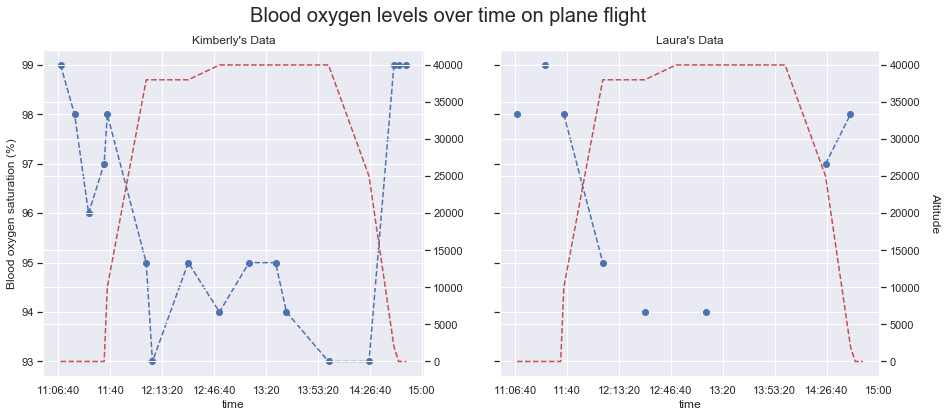

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 6))
ax1.plot(data['time'], data['k_bloodoxy'], 'bo--')
ax1.set_ylabel('Blood oxygen saturation (%)')
ax2.plot(data['time'], data['l_bloodoxy'], 'bo--')
fig.suptitle('Blood oxygen levels over time on plane flight', fontsize=20)

ax3 = ax1.twinx()
ax3.plot(data['time'], data['altitude'], 'r--')
ax4 = ax2.twinx()
ax4.plot(data['time'], data['altitude'], 'r--')
ax4.set_ylabel('Altitude', rotation=270, labelpad=20)
ax1.set_title("Kimberly's Data")
ax2.set_title("Laura's Data")

Text(0, 0.5, 'Altitude')

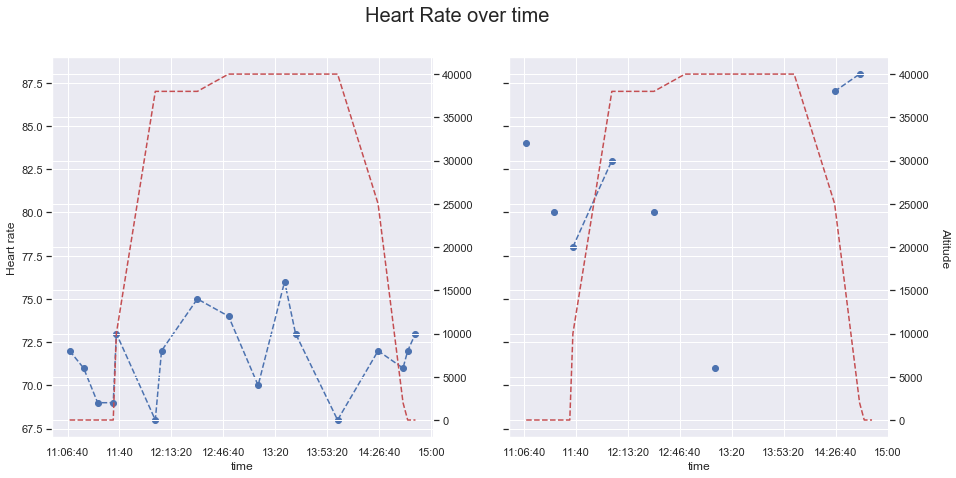

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,7))
ax1.plot(data['time'], data['k_heartrate'], 'bo--')
ax1.set_ylabel('Heart rate')
ax2.plot(data['time'], data['l_heartrate'], 'bo--')
fig.suptitle('Heart Rate over time', fontsize=20)

ax3 = ax1.twinx()
ax3.plot(data['time'], data['altitude'], 'r--')
ax4 = ax2.twinx()
ax4.plot(data['time'], data['altitude'], 'r--')
ax4.set_ylabel('Altitude', rotation=270, labelpad=20)

In [5]:
treatment = data[data['altitude'] > 20000]
control = data[data['altitude'] < 10000]
treatment

,time,altitude,k_bloodoxy,k_heartrate,l_bloodoxy,l_heartrate
time,,,,,,
12:03:00,12:03:00,38000,95,68,95.0,83.0
12:07:00,12:07:00,38000,93,72,NaN,NaN
12:30:00,12:30:00,38000,95,75,94.0,80.0
12:50:00,12:50:00,40000,94,74,NaN,NaN
13:09:00,13:09:00,40000,95,70,94.0,71.0
13:26:00,13:26:00,40000,95,76,NaN,NaN
13:33:00,13:33:00,40000,94,73,NaN,NaN
14:00:00,14:00:00,40000,93,68,NaN,NaN
14:26:00,14:26:00,25000,93,72,97.0,87.0


In [21]:
""" Question: Does altitude affect blood oxygen levels """

# The most basic test to do here is a Wilcoxon Rank Sum test. These are totally non-parametic.
# This data is technically repeat measurements of one person (me), so there is some correlate
print(treatment['k_bloodoxy'].tolist())
print(control['k_bloodoxy'].tolist())
stat, p = mannwhitneyu(treatment['k_bloodoxy'].tolist(),
                       control['k_bloodoxy'].tolist(),
                      alternative='greater')
print(stat)
print(p)

# The p-value assumes a normal distribution, though the statistic does not.

[95, 93, 95, 94, 95, 95, 94, 93, 93]
[99, 98, 96, 97, 99, 99, 99]
0.0
0.9997210285009398


In [26]:
# Since the sample sizes are so small we can calculate test statistics by hand
# Get the time complexity of this version
U1 = 0
for num in treatment['k_bloodoxy'].tolist():
    bigger = [x for x in control['k_bloodoxy'].tolist() if x > num ]
    U1 += len(bigger)
print(U1)

U2 = 0
for num in control['k_bloodoxy'].tolist():
    bigger = [x for x in treatment['k_bloodoxy'].tolist() if x > num ]
    U2 += len(bigger)
print(U2)

# Get the time complexity of this version
x = np.asarray(treatment['k_bloodoxy'].tolist())
y = np.asarray(control['k_bloodoxy'].tolist())

63
0


In [64]:
n1 = len(x)
n2 = len(y)
arr = np.concatenate((x, y))
sorter = np.argsort(arr, kind='quicksort') # returns indices that would sort array
inv = np.zeros(sorter.size, dtype=np.intp) # 0 array
inv[sorter] = np.arange(sorter.size, dtype=np.intp) # What??
arr = arr[sorter] # Now the array is sorted
obs = np.r_[True, arr[1:] != arr[:-1]] # Array where 'True' indicates first of a unique value
dense = obs.cumsum()[inv] # rank each value for 1 - num_unique_values
count = np.r_[np.nonzero(obs)[0], len(obs)] # np.nonzero(obs)[0] is where the non-zero values are located, indicating the next unique value
ranked = .5 * (count[dense] + count[dense - 1] + 1) # For each set of non-unique values, get the middle value
# Now they are in the initial order, but with their rank
rankx = ranked[0:n1]  # get the x-ranks
u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0)  # calc U for x
u2 = n1*n2 - u1  # remainder is U for y
print(u1)
print(u2)

63.0
0.0


In [ ]:
# What other types of statistical tests could be used?
# Mann Whitney U test is a pretty straight forward one.

In [ ]:
""" What else can we learn from this data?? """
# Conclusion: Blood oxygen drops ~5%.
# Heart rate unaffected.
# on to the next adventure